nao encontro relacoes ...

In [36]:
import pandas as pd
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [37]:
precos = {"BCP.LS": "",
          "GALP.LS": "",
          "EDP.LS": "",
          "SON.LS": "",
          "EGL.LS": ""}

for symbol in precos:
    # https://www.alphavantage.co
    key = "IX6KSZ9IKG9ZXMF5"
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol={symbol}&apikey={key}"
    r = requests.get(url)
    data = r.json()
    close_prices = {date[:7].replace("-", ""): float(details['4. close']) for date, details in data['Monthly Adjusted Time Series'].items()}
    precos[symbol] = close_prices

"""
stockVSnews(empresa = "Banco Comercial Português", symbol = "BCP.LS")
stockVSnews(empresa = "Galp Energia", symbol = "GALP.LS")
stockVSnews(empresa = "EDP", symbol = "EDP.LS")
stockVSnews(empresa = "Sonae", symbol = "SON.LS")
stockVSnews(empresa = "Mota-Engil", symbol = "EGL.LS")
"""
""

''

In [38]:
df = pd.read_parquet("data05.parquet")

def sentimentos_mensais(x):
    sentimentos_mensais = {}
    for i in x:
        if i["tstamp"] not in sentimentos_mensais:
            sentimentos_mensais[i["tstamp"]] = [i["newsSentiment"]]
        else:
            sentimentos_mensais[i["tstamp"]].append(i["newsSentiment"])
    return sentimentos_mensais

dfD = df["news"].map(sentimentos_mensais)
dfD

companies
Banco Comercial Português    {'200109': [-0.5811319723551301, 0.65961613537...
Galp Energia                 {'200209': [0.6148666666666666], '200210': [0....
EDP                          {'200010': [0.6440112554112554], '200109': [0....
Sonae                        {'200003': [0.2454274725274725], '200102': [0....
Mota-Engil                   {'200409': [0.6649318614718615], '200412': [0....
Name: news, dtype: object

In [39]:
def stockVSnews(news, close_prices):
    """news and close_prices are dictionaries with
            dates as keys
            values as the number of news and the close prices, respectively"""
    # Encontrar as datas que existem tanto em news quanto em close_prices
    common_dates = sorted(set(news.keys()) & set(close_prices.keys()), key=lambda x: datetime.strptime(x, '%Y%m'))

    # Filtrar os dados para apenas essas datas comuns
    y_news = [news[date] for date in common_dates]
    y_prices = pd.Series([close_prices[date] for date in common_dates])
    y_prices = y_prices.diff()

    # Criar gráfico
    fig, ax1 = plt.subplots(figsize=(15, 6))

    # Gráfico de barras para news (no eixo y à esquerda)
    ax1.bar(common_dates, y_news, color='skyblue', label='News Quantity')
    ax1.set_xlabel('Year-Month', fontsize=12)
    ax1.set_ylabel('News Quantity', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='skyblue')
    ax1.set_title(f'News and Prices per Year-Month ({min(common_dates)} to {max(common_dates)})', fontsize=14)
    ax1.tick_params(axis='x', rotation=90, labelsize=8)

    # Criar o segundo eixo y para os preços (gráfico de linha)
    ax2 = ax1.twinx()
    ax2.plot(common_dates, y_prices, label='Close Prices')
    ax2.set_ylabel('Close Prices (€)', fontsize=12)
    ax2.tick_params(axis='y')

    # Adicionar legendas
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Ajustar layout
    plt.tight_layout()
    plt.show()

#stockVSnews(dfDEDP, close_prices)

/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_10524/1422393965.py:20: RuntimeWarning: invalid value encountered in log
  news5[key] = np.log(np.sum(data_sentimentos[key]))
/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_10524/1422393965.py:20: RuntimeWarning: divide by zero encountered in log
  news5[key] = np.log(np.sum(data_sentimentos[key]))


Info1: media dos sentimentos do mes
Correlation: -0.18034302597908775


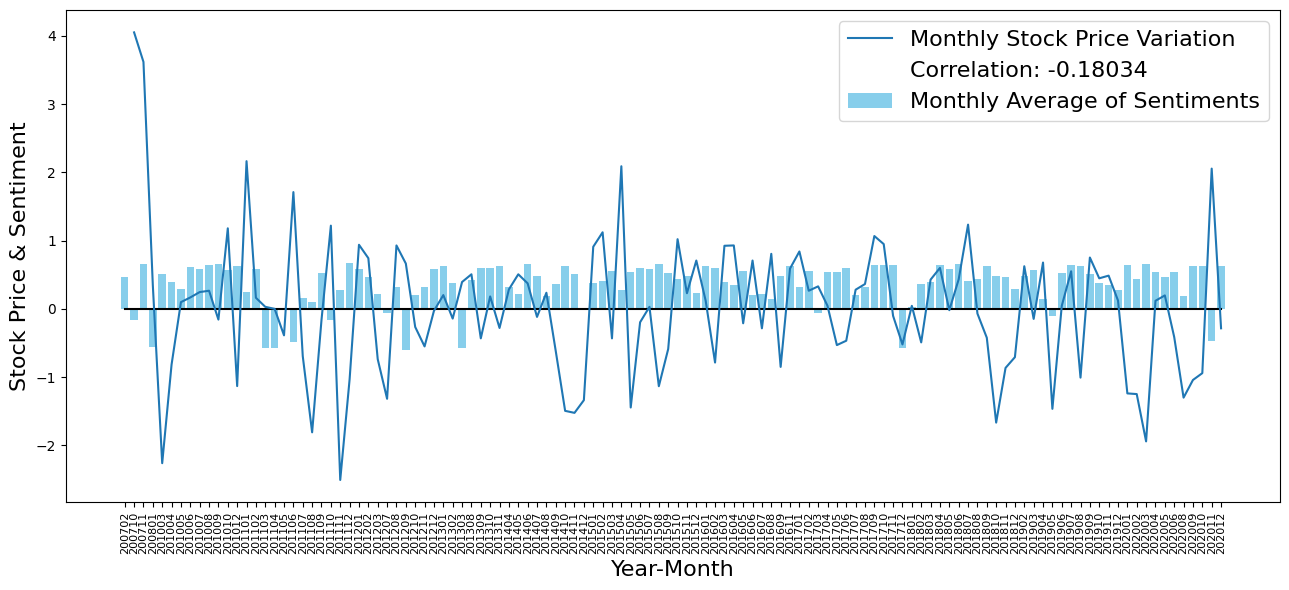

Info4: mes se é positivo ou negativo
Correlation: -0.1401055011239525


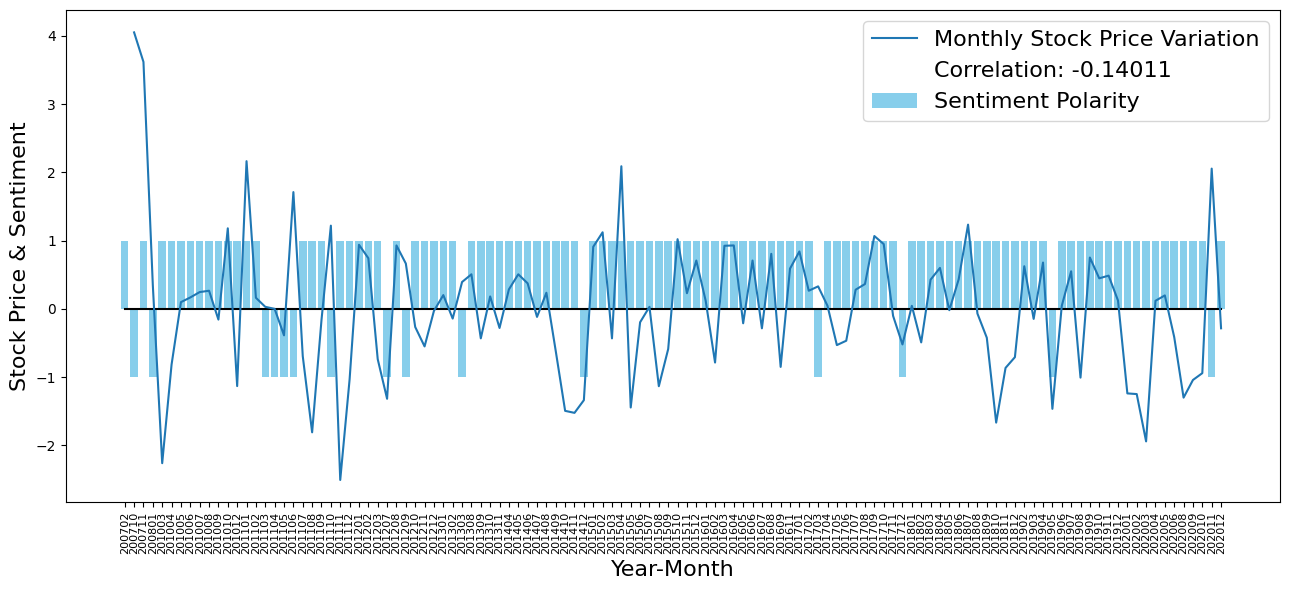

In [ ]:
empresa = "Galp Energia"
symbol = "GALP.LS"

close_prices = precos[symbol]

data_sentimentos = dfD[empresa].copy()
news1, news2, news3, news4, news5, news6, news7, news8, news10 = {}, {}, {}, {}, {}, {}, {}, {}, {}
news11, news12, news13, news14 = {}, {}, {}, {}
for key in data_sentimentos:
    news1[key] = np.mean(data_sentimentos[key])
    news2[key] = np.sum(data_sentimentos[key])
    som = 0
    for i in data_sentimentos[key]:
        if i > 0:
            som += 1
        elif i < 0:
            som -= 1
    news3[key] = som
    news4[key] = -1 if np.mean(data_sentimentos[key]) < 0 else 1
    news5[key] = np.log(np.sum(data_sentimentos[key]))
    news6[key] = len(data_sentimentos[key])
    news7[key] = len(data_sentimentos[key])
    news8[key] = len(data_sentimentos[key])
    news10[key] = len(data_sentimentos[key])
    news11[key] = len(data_sentimentos[key])
    news12[key] = len(data_sentimentos[key])
    news13[key] = len(data_sentimentos[key])
    news14[key] = len(data_sentimentos[key])

def a(news, n):
    common_dates = sorted(set(news.keys()) & set(close_prices.keys()), key=lambda x: datetime.strptime(x, '%Y%m'))    
    y_news = [news[date] for date in common_dates]
    y_prices = pd.Series([close_prices[date] for date in common_dates])
    y_prices = y_prices.diff()
    if n == 7:
        y_news = pd.Series(y_news).diff()
    elif n == 8:
        y_news = pd.Series(y_news).diff()
        y_prices = np.abs(y_prices)
    elif n==10:
        y_news = np.log(np.abs(pd.Series(y_news).diff()) + 1)
        y_prices = np.abs(y_prices)
    elif n == 11:
        y_news = np.log(pd.Series(y_news).diff())
    elif n == 12:
        y_news = pd.Series(y_news).diff()
        y_prices = np.exp(y_prices)
    elif n == 13:
        def f(x):
            if x > 0:
                return np.log(x)
            elif x < 0:
                return -np.log(-x)
            return 0
        y_news = pd.Series(y_news).diff().map(f)
    elif n == 14:
        y_prices = pd.Series([close_prices[date] for date in common_dates])
        y_prices = y_prices.diff() 
        y_prices /= y_prices.shift(1)
        y_news = pd.Series(y_news).diff()

    if n == 1:
        h = "Monthly Average of Sentiments"
    if n == 4:
        h = "Sentiment Polarity"

    plt.figure(figsize=(13, 6))
    plt.plot(common_dates, np.zeros(len(common_dates)), color="black")
    plt.bar(common_dates, y_news, color='skyblue', label=h)
    plt.plot(common_dates, y_prices, label='Monthly Stock Price Variation')
    
    
    

    x_clean, y_clean = pd.Series(y_news).dropna(), y_prices.dropna()
    common_indices = x_clean.index.intersection(y_clean.index)
    x_clean = x_clean[common_indices]
    y_clean = y_clean[common_indices]
    correlation = x_clean.corr(y_clean)
    print(f"Correlation: {correlation}")
    plt.plot(0,0,alpha=0,label=f"Correlation: {round(correlation,5)}")
    #plt.legend()
    plt.ylabel('Stock Price & Sentiment', fontsize=16)
    plt.xlabel('Year-Month', fontsize=16)
    plt.legend(fontsize=16)

    plt.xticks(rotation=90, fontsize=8)
    plt.tight_layout()
    plt.gca().set_facecolor("none")  # Set plot face background to transparent
    #plt.savefig(f"newsVSsenti0{n}.svg", format="svg", transparent=True)  # Save as SVG with transparent background

    plt.show()

info = {1: "media dos sentimentos do mes",
        4: "mes se é positivo ou negativo",
        #5: "log da soma dos sentimentos do mes, pq Redução de Disparidades Extremas, Linearização da Relação",
        #6: "número de notícias do mês",
        #7: "número de notícias do mês, diferenciado",
        #8: "número de notícias do mês e varicao do preco em abs",
        #10: "numero de noticias do mes, mas em log",
        #11: "número de notícias do mês, diferenciado e em log",
        #12: "número de notícias do mês, diferenciado e dif de precos em exp",
        #13: "número de notícias do mês, diferenciado e em log",
        #14: "número de notícias do mês, diferenciado e dif de precos em %"
        }
i = 0
interessantes = [news1, news4, news5, news7, news13,news5, news7, news13, news14]
for n in [news1, news4] : #[news1, news2, news3, news4, news5, news6, news7, news8]
    ii = list(info.keys())[i]
    print(f"Info{ii}: {info[ii]}")
    a(n, ii)
    i += 1



a meu ver, e de acordo com os coef de correlacao, n ha nenhuma corr entre qnt de noticias e variacao do preco...

- simplesmente n existe

- fiz mal os sentimentos

- tnh noticias irrelevantes

- n tnh ideias...